In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = None


In [2]:
# Parameters
product = {
    "nb": "/home/jerem/intention1.0/output/intention_decision_curiosity_math.ipynb"
}


# Intention, Décision & Curiosité – Formules Mathématiques & Physiques

Ce carnet Jupyter rassemble **les principales équations** issues de la psychologie quantitative, de l’économie comportementale, de la neuroscience computationnelle **et des analogies physiques** qui sous‑tendent les concepts d’intention, de prise de décision et de curiosité intrinsèque.  
Chaque section contient :

* un rappel théorique avec formules en \\( \LaTeX \\),
* des cellules Python illustratives (simulations, tracés),
* des **exercices** (+ solutions en fin de section).

Exécute les cellules pas à pas, modifie les paramètres et… reste curieux !


## 1. Modéliser l’intention

### 1.1 Théorie du comportement planifié (Ajzen)

\\[
\text{Intention} = w_1 \, \text{Attitude} \;+\; w_2 \, \text{Norme subjective} \;+\; w_3 \, \text{Contrôle perçu}
\\]

où  
* **Attitude** : évaluation personnelle du comportement,  
* **Norme subjective** : pression sociale perçue,  
* **Contrôle comportemental perçu** : facilité/difficulté anticipée,  
* \\(w_i\\) : poids (estimés par régression logistique).

### 1.2 Implémentation : prédire l’intention de pratiquer une activité physique

Dans l’exemple ci‑dessous, on :

1. génère un échantillon synthétique (N = 250),
2. ajuste une **régression logistique**,
3. visualise la probabilité d’intention en fonction des trois prédicteurs.


Poids estimés : [0.85 0.83 0.87]
Intercept :    [0.26]


/home/jerem/intention1.0/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


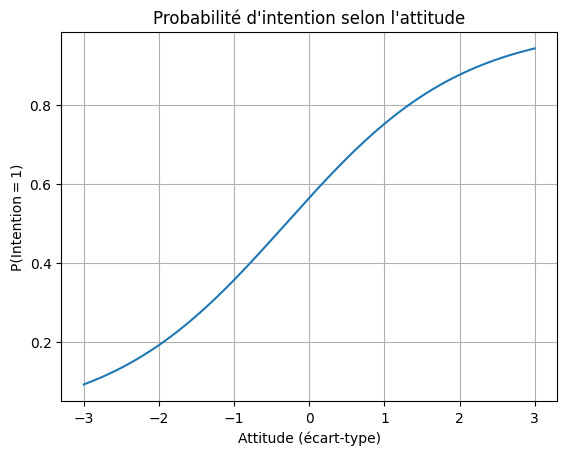

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Génération de données synthétiques
np.random.seed(42)
N = 250
att = np.random.normal(0, 1, N)
norm = np.random.normal(0, 1, N)
ctrl = np.random.normal(0, 1, N)
# vrais poids
w = np.array([1.2, 0.8, 1.0])
z = 0.5 + w[0]*att + w[1]*norm + w[2]*ctrl
prob = 1/(1+np.exp(-z))
intent = (np.random.rand(N) < prob).astype(int)

df = pd.DataFrame({'Attitude': att, 'Norme': norm, 'Contrôle': ctrl, 'Intention': intent})

# Modèle
X = df[['Attitude', 'Norme', 'Contrôle']]
y = df['Intention']
model = LogisticRegression()
model.fit(X, y)

print('Poids estimés :', np.round(model.coef_[0], 2))
print('Intercept :   ', np.round(model.intercept_, 2))

# Visualisation 2‑D pour Attitude vs Probabilité (les autres fixés à 0)
att_grid = np.linspace(-3, 3, 200)
X_plot = np.c_[att_grid, np.zeros_like(att_grid), np.zeros_like(att_grid)]
p_plot = model.predict_proba(X_plot)[:,1]

plt.plot(att_grid, p_plot)
plt.xlabel('Attitude (écart‑type)')
plt.ylabel('P(Intention = 1)')
plt.title("Probabilité d'intention selon l'attitude")
plt.grid(True)
plt.show()

**Exercice 1.1 :**  
*Change les poids \\(w_i\\) (ou le nombre d’observations) et observe comment la courbe logistique évolue.*  

---



## 2. Théorie de la décision

### 2.1 Utilité espérée

\\[
EU(a) = \sum_{i=1}^n p_i \, u(x_i)
\\]

où \\(p_i\\) est la probabilité de l’issue \\(x_i\\), et \\(u\\) la fonction d’utilité.

### 2.2 Théorie des perspectives (Kahneman & Tversky)

Valeur :

\\[
v(x)=
\\begin{cases}
  x^{\\alpha}, & \\text{si } x \\ge 0,\\\\
  -\\lambda\\,(-x)^{\\beta}, & \\text{si } x < 0,
\\end{cases}
\\]

avec \\(\\lambda>1\\) (aversion aux pertes), \\(0<\\alpha,\\beta<1\\).

Pondération des probabilités :

\\[
\\pi(p)=\\frac{p^{\\gamma}}{\\bigl(p^{\\gamma}+(1-p)^{\\gamma}\\bigr)^{1/\\gamma}}
\\]

### 2.3 Règle softmax

\\[
P(a)=\\frac{\\exp(\\beta Q(a))}{\\sum_b \\exp(\\beta Q(b))}
\\]

avec \\(\\beta\\) : *“inverse temperature”* (contrôle l’exploitation/exploration).

### 2.4 Simulation du modèle drift‑diffusion (DDM)

Le DDM modélise le temps et l’exactitude d’une décision binaire :

\\[
dx_t = k \\, dt + \\sigma \\, dW_t,
\\quad
\\text{décision quand } |x_t| \\ge A
\\]

où  
* \\(k\\) : dérive (evidence),  
* \\(\\sigma\\) : bruit,  
* \\(A\\) : seuil.

Le code suivant simule 500 trials et trace la distribution des temps de décision. 


Exactitude : 0.65


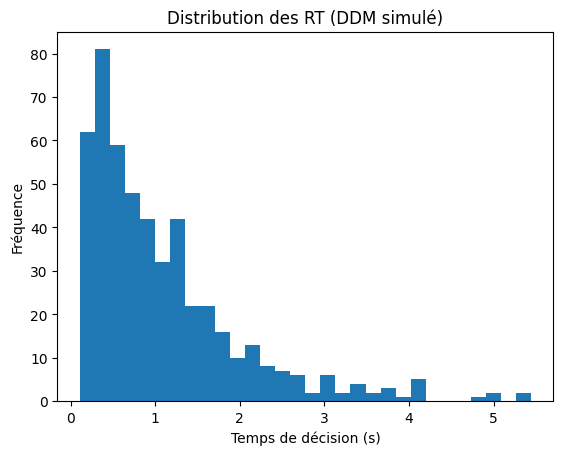

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ddm(n_trials=500, k=0.3, sigma=1.0, A=1.0, dt=0.01):
    rts = []
    choices = []
    for _ in range(n_trials):
        x = 0
        t = 0
        while abs(x) < A:
            dx = k*dt + sigma*np.sqrt(dt)*np.random.randn()
            x += dx
            t += dt
        rts.append(t)
        choices.append(int(x > 0))
    return np.array(rts), np.array(choices)

rts, choices = simulate_ddm()
print('Exactitude :', choices.mean())
plt.hist(rts, bins=30)
plt.xlabel('Temps de décision (s)')
plt.ylabel('Fréquence')
plt.title('Distribution des RT (DDM simulé)')
plt.show()

**Exercice 2.1 :**  
*Varie \\(k\\), \\(\\sigma\\) ou \\(A\\) et mesure l’effet sur la vitesse et la précision.*  

---



## 3. Curiosité & théorie de l’information

### 3.1 Entropie de Shannon  

\\[
H(X) = -\\sum_{x} p(x)\\,\\log_2 p(x)
\\]

### 3.2 Divergence de Kullback–Leibler  

\\[
D_{\\text{KL}}\\bigl(P \\parallel Q\\bigr)=\\sum_x P(x)\\,\\log\\frac{P(x)}{Q(x)}
\\]

### 3.3 Gain d’information (mutual information)

\\[
I(X;Y)=H(X)-H(X\\mid Y)
\\]

### 3.4 Free‑energy (active inference, Friston)

\\[
\\mathcal F = \\mathbb E_q\\bigl[\\ln q(s) - \\ln p(s,o)\\bigr]
\\]

Minimiser \\(\\mathcal F\\) ≈ maximiser l’**exactitude** tout en minimisant la **complexité**.

### 3.5 Bonus de curiosité (ICM)

\\[
R_t^{\\text{int}} = \\tfrac{1}{2}\\Bigl\\| \\hat\\phi(s_{t+1}) - \\phi(s_{t+1}) \\Bigr\\|^2
\\]

avec \\(\\phi\\) : encodeur d’état, \\(\\hat\\phi\\) : prédiction du modèle dynamique interne.

#### Exemple : entropie d’une pièce biaisée


In [5]:
import numpy as np
import math

p = 0.3  # probabilité de pile
entropy = - (p*math.log2(p) + (1-p)*math.log2(1-p))
print(f"Entropie d'une pièce biaisée (p={p}) : {entropy:.3f} bits")

Entropie d'une pièce biaisée (p=0.3) : 0.881 bits


**Exercice 3.1 :**  
*Écris une fonction qui prend une liste de probabilités \\(p_i\\) et renvoie l’entropie correspondante. Teste‑la avec une loi uniforme (maximum d’entropie) puis avec une loi très concentrée.*  

---



## 4. Exploration / Exploitation : algorithmes

### 4.1 Epsilon‑gourmand (\\(\\varepsilon\\)-greedy)

\\[
a_t =
\\begin{cases}
\text{argmax}_i \\, Q_i, & \\text{avec proba } 1-\\varepsilon, \\\\
\text{action aléatoire}, & \\text{avec proba } \\varepsilon.
\\end{cases}
\\]

### 4.2 Upper Confidence Bound (UCB‑1)

\\[
a_t = \\,\underset{i}{\\operatorname{argmax}}\\,
\\Bigl[\\bar X_i + c\\,\\sqrt{\\tfrac{2\\ln t}{n_i}}\\Bigr]
\\]

où  
* \\(\\bar X_i\\) : gain moyen observé du bras \\(i\\),  
* \\(n_i\\) : nombre de tirages du bras \\(i\\),  
* \\(t\\) : nombre total de tirages,  
* \\(c\\) : paramètre d’optimisme.

### 4.3 Thompson Sampling

Choisir \\(a\\sim \\text{argmax}_{i}\\, \\tilde\\theta_i\\) où \\(\\tilde\\theta_i\\) est un échantillon de la postérieure \\(P(\\theta_i \\mid \\text{données})\\).

#### Illustration : bandit 10 bras, \\(\\varepsilon=0.1\\)


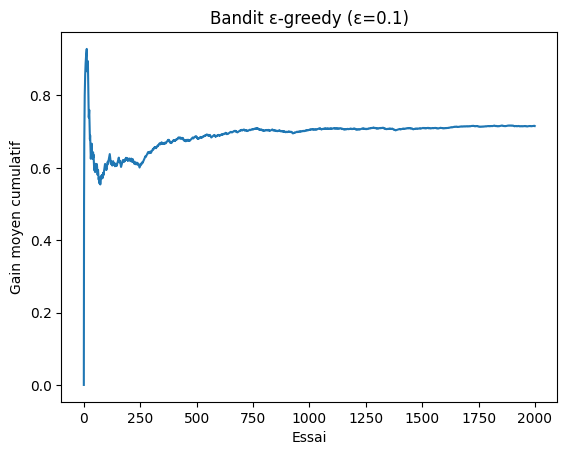

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n_arms = 10
true_p = np.random.beta(2,5, size=n_arms)   # vraies proba de gain
Q = np.zeros(n_arms)
N = np.zeros(n_arms)
eps = 0.1
T = 2000
rewards = []

for t in range(T):
    if np.random.rand() < eps:
        a = np.random.randint(n_arms)
    else:
        a = np.argmax(Q)
    r = 1 if np.random.rand() < true_p[a] else 0
    rewards.append(r)
    N[a] += 1
    Q[a] += (r - Q[a]) / N[a]          # MAJ incrémentale

cumrew = np.cumsum(rewards)
plt.plot(cumrew / (np.arange(T)+1))
plt.xlabel('Essai')
plt.ylabel('Gain moyen cumulatif')
plt.title('Bandit ε‑greedy (ε=0.1)')
plt.show()

**Exercice 4.1 :**  
*Implémente le même bandit avec l’algorithme **UCB‑1** et compare le gain moyen obtenu.*  

---



## 5. Analogies physiques

| Concept cog./IA | Analogue physique | Équation clé |
|-----------------|-------------------|--------------|
| Descente de gradient | Mouvement d’une particule dans un potentiel visqueux | \\(\\theta_{t+1}=\\theta_t-\\eta\,\\nabla J(\\theta_t)\\) |
| Drift‑diffusion (décision) | Mouvement brownien avec dérive | \\(dx = k\,dt + \\sigma\,dW_t\\) |
| Free‑energy (Friston) | Potentiel Helmholtz \\(F=E-TS\\) en thermo‑stat | \\(\\mathcal F = \\langle \\ln q - \\ln p \\rangle_q\\) |
| UCB | Inégalité de concentration de Hoeffding | \\(\\bar X_i + c\\sqrt{\\frac{2\\ln t}{n_i}}\\) |
| Thompson Sampling | Mécanique statistique : échantillonnage Boltzmann | \\(p(\\theta\\mid D)\\propto p(D\\mid\\theta)p(\\theta)\\) |

### 5.1 Principe de moindre action (rappel)

En mécanique analytique, **l’action** :

\\[
S=\\int_{t_0}^{t_1} L(q,\\dot q,t)\\,dt
\\]

La trajectoire réelle minimise \\(S\\).  
Analogie : un algorithme cherche un minimum de **fonction coût**.

### 5.2 Simulation : descente de gradient sur une fonction à deux minima



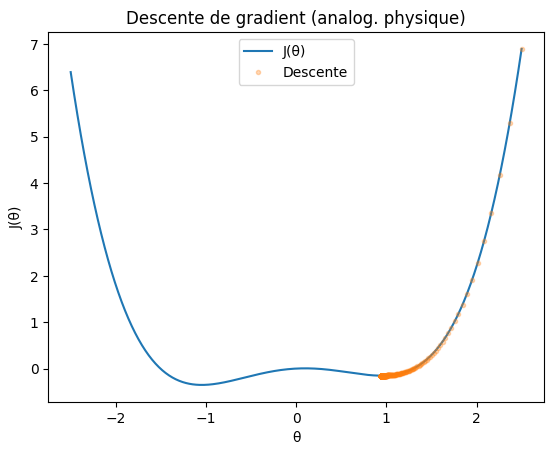

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def J(theta):
    return (theta**4)/4 - (theta**2)/2 + 0.1*theta

def dJ(theta):
    return theta**3 - theta + 0.1

theta = 2.5
eta = 0.01
traj = []
for _ in range(5000):
    traj.append(theta)
    theta -= eta * dJ(theta)

theta_grid = np.linspace(-2.5, 2.5, 400)
plt.plot(theta_grid, J(theta_grid), label='J(θ)')
plt.plot(traj, J(np.array(traj)), '.', alpha=0.3, label='Descente')
plt.xlabel('θ')
plt.ylabel('J(θ)')
plt.legend()
plt.title('Descente de gradient (analog. physique)')
plt.show()

**Exercice 5.1 :**  
*Modifie \\(\\eta\\) (taux d’apprentissage) ou la dérivée \\(dJ\\) pour voir comment cela affecte la convergence. Compare avec le concept de température dans l’algorithme softmax.*  

---



## Solutions (cliquer pour dérouler)

*(Les cellules suivantes contiennent des solutions possibles aux exercices. Masque‑les si tu souhaites d’abord essayer par toi‑même.)*  
